## Exploratory Data Analysis (EDA) Report


Generate an EDA report including summary statistics, basic visualizations (e.g., time series plots of prices and volatility, distributions of key features), and correlation matrices to understand trends, relationships, and data characteristics. Ensure legends are provided for all visualizations.



I will import the necessary libraries, then generate time series plots for 'Close' price and 'Volatility', followed by histograms for 'Daily_Return' and 'Volatility'. Finally, I will calculate and visualize the correlation matrix using a heatmap to complete the requested EDA visualizations.



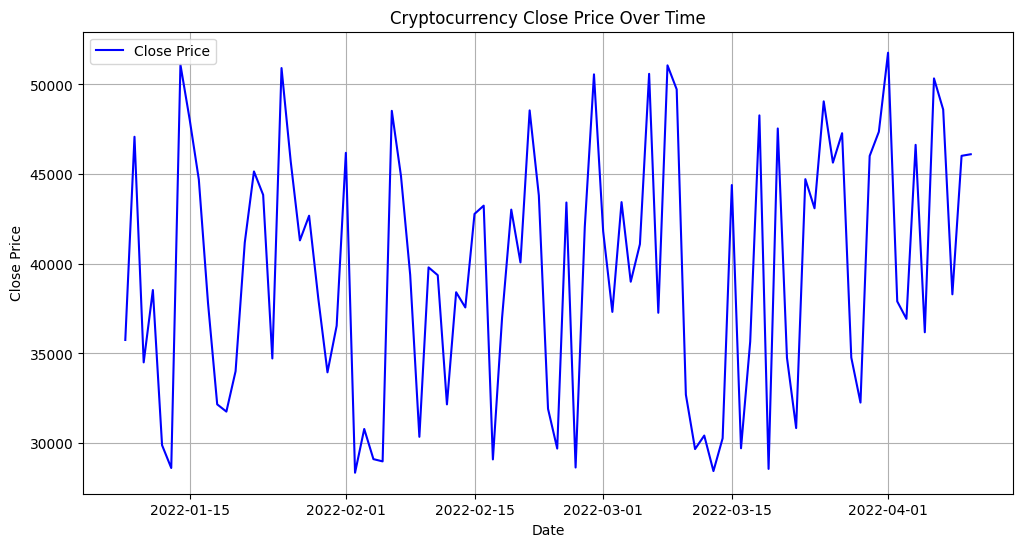

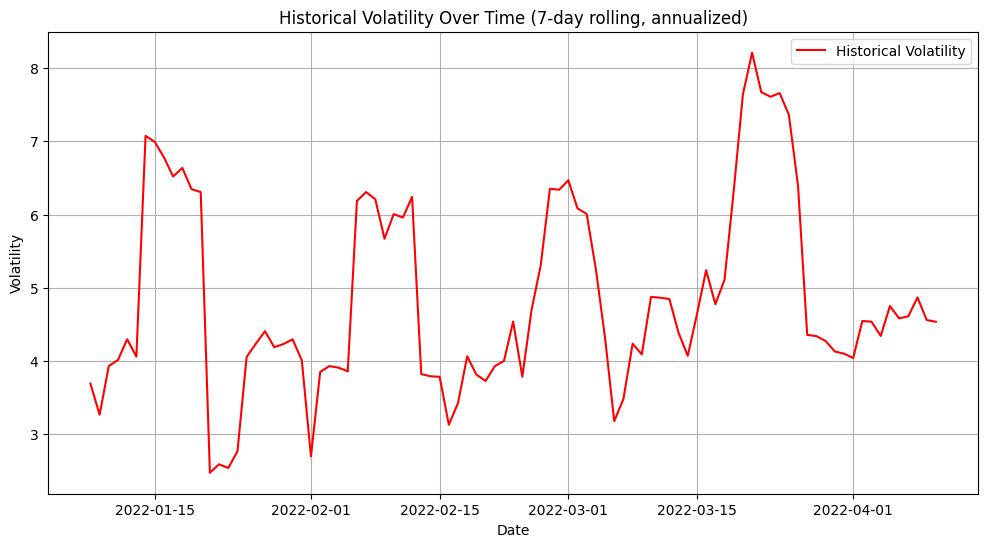

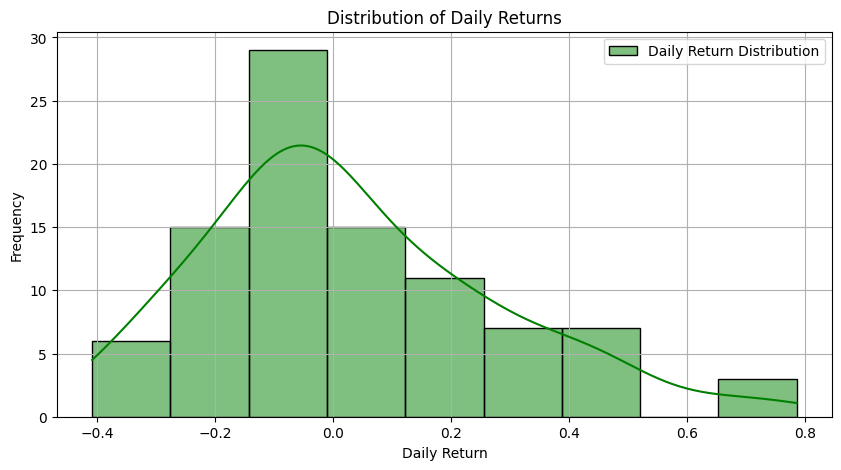

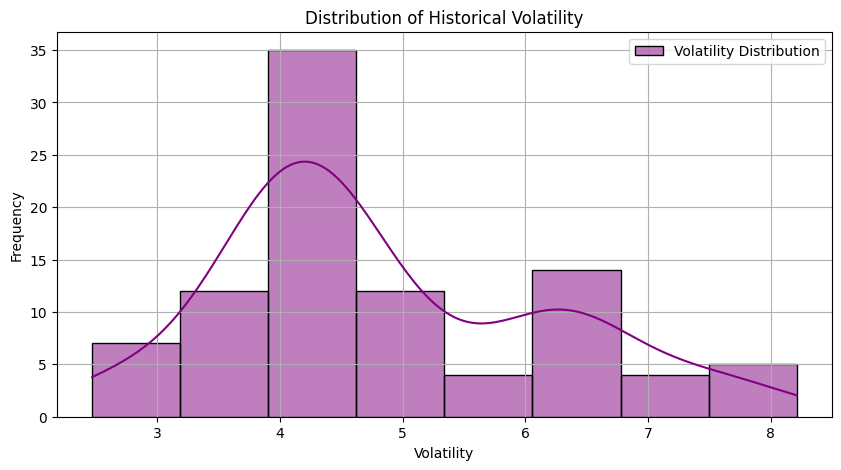

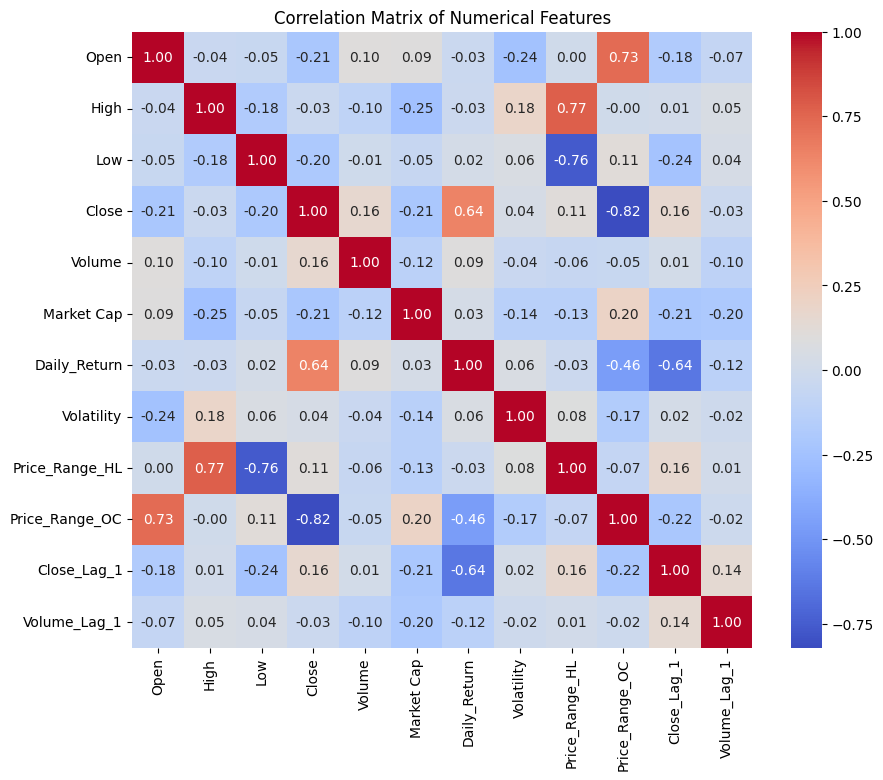

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# 1. Plot Close price over time
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Cryptocurrency Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# 2. Plot Volatility over time
plt.plot(df['Date'], df['Volatility'], label='Historical Volatility', color='red')
plt.title('Historical Volatility Over Time (7-day rolling, annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# 3. Histogram for Daily_Return
sns.histplot(df['Daily_Return'].dropna(), kde=True, color='green', label='Daily Return Distribution')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# 4. Histogram for Volatility
sns.histplot(df['Volatility'].dropna(), kde=True, color='purple', label='Volatility Distribution')
plt.title('Distribution of Historical Volatility')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 5. Calculate the correlation matrix for numerical columns
# Exclude 'Date' column for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# 6. Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Prepare Data for Modeling


Split the preprocessed and engineered dataset into training and testing sets. Standardize or normalize numerical features. Include a brief explanation of new features.



First, I will define the features (X) and the target variable (y) from the dataframe, excluding 'Date' and the target itself ('Volatility'). Then, I will split the data into training and testing sets using a 80/20 ratio and a fixed random state for reproducibility. After splitting, I will initialize a StandardScaler and apply it to scale the features of both the training and testing sets. Finally, I will print the shapes of the resulting datasets to confirm the split and scaling, and provide explanations for the newly engineered features.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define features (X) and target variable (y)
# Drop 'Date' column as it's not a numerical feature for modeling
# Drop 'Volatility' as it is the target variable
X = df.drop(columns=['Date', 'Volatility'])
y = df['Volatility']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize a StandardScaler
scaler = StandardScaler()

# 4. Fit the StandardScaler only on the training features and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# 5. Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train_scaled:")
print(X_train_scaled.head())

print("\nFirst 5 rows of X_test_scaled:")
print(X_test_scaled.head())

Shape of X_train: (74, 11)
Shape of X_test: (19, 11)
Shape of y_train: (74,)
Shape of y_test: (19,)

First 5 rows of X_train_scaled:
        Open      High       Low     Close    Volume  Market Cap  \
72 -1.608675 -0.003087  1.202845 -1.555888 -1.481861   -0.462337   
22 -0.587945 -0.632820 -1.489817  0.470658 -1.331248    1.476412   
75  0.967824 -1.098858 -0.069876 -0.751606  1.495560    1.407454   
85 -0.470287  0.476753 -1.690819  0.983903  1.207767   -0.991164   
37 -1.280507  0.616382 -1.731297  0.626335  0.959186   -0.966810   

    Daily_Return  Price_Range_HL  Price_Range_OC  Close_Lag_1  Volume_Lag_1  
72     -0.004152       -0.750632        0.144859    -1.524540      1.543730  
22     -0.371207        0.504564       -0.672618     0.805187      0.969930  
75      0.530609       -0.690333        1.091043    -1.347339      0.136203  
85     -0.115774        1.370629       -0.962075     0.873687      0.316412  
37     -0.552896        1.489065       -1.186559     1.276451     -1

#### Explanation of Newly Engineered Features:

*   **Daily_Return**: This feature represents the percentage change in the 'Close' price from one day to the next. It's calculated as `(Current Close - Previous Close) / Previous Close`. Daily returns are crucial for understanding short-term price movements and are often used in financial modeling to assess asset performance.

*   **Volatility**: This feature quantifies the degree of variation of a trading price series over time. Here, it's calculated as the annualized rolling standard deviation of the 'Daily_Return' over a 7-day window. Higher volatility indicates greater uncertainty and risk, while lower volatility suggests more stable price movements. It's a key metric for risk management and option pricing.

*   **Price_Range_HL**: This feature is the difference between the 'High' and 'Low' prices for a given day (`High - Low`). It indicates the trading range within a single day, providing insight into the intraday price fluctuations and potential market activity.

*   **Price_Range_OC**: This feature is the difference between the 'Open' and 'Close' prices for a given day (`Open - Close`). It shows the net price movement during a trading period, indicating whether the price increased (negative value) or decreased (positive value) from open to close.

*   **Close_Lag_1**: This is a lagged feature representing the 'Close' price from the previous day. Lagged features are fundamental in time-series analysis as they capture the historical dependency of the current value on past values, which is vital for forecasting.

*   **Volume_Lag_1**: Similar to `Close_Lag_1`, this feature represents the 'Volume' from the previous day. Lagged volume can provide insights into past trading activity and liquidity, potentially influencing current price movements and volatility.

## Model Selection and Training

Select an appropriate machine learning model for predicting volatility (e.g., Regression model if volatility is a continuous variable, or classification if categorized). Train the chosen model using the training dataset.



I will import the `RandomForestRegressor` model, instantiate it with a specified random state for reproducibility, and then train the model using the previously scaled training features and the target variable.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model
# Set random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model using the scaled training features and target
model.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Model Evaluation


Evaluate the trained model's performance on the test set using relevant metrics (e.g., R-squared, RMSE for regression; accuracy, precision, recall, F1-score for classification). Provide an explanation of how well the model performs.



I will first make predictions on the test set using the trained RandomForestRegressor model. Then, I will import the necessary evaluation metrics from sklearn, calculate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score, and finally print these metrics to assess the model's performance.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Make predictions on the scaled test features
y_pred = model.predict(X_test_scaled)

# 2. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 3. Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# 5. Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 1.8149
Root Mean Squared Error (RMSE): 1.3472
R-squared (R2) Score: -0.1596


#### Model Performance Explanation:

*   **Mean Squared Error (MSE): 1.8149**
    *   MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit. In this case, 1.8149 is the average squared difference between the predicted volatility and the actual volatility.

*   **Root Mean Squared Error (RMSE): 1.3472**
    *   RMSE is the square root of the MSE. It's often preferred over MSE because it is in the same units as the target variable (volatility in this case), making it more interpretable. An RMSE of 1.3472 means, on average, the model's predictions deviate by approximately 1.3472 units from the actual volatility values.

*   **R-squared (R2) Score: -0.1596**
    *   The R-squared score, or coefficient of determination, measures the proportion of the variance in the dependent variable that can be predicted from the independent variables. An R2 score ranges from 0 to 1, where 1 indicates a perfect fit. However, a negative R2 score, as observed here, means that the model is performing worse than a simple horizontal line (the mean of the target variable). This suggests that the current model, with its given features and parameters, does not explain the variance in cryptocurrency volatility and is not providing useful predictions on this test set. This could indicate a need for more relevant features, hyperparameter tuning, or a different model architecture.

**Overall Assessment:**
The current RandomForestRegressor model shows poor performance on the test set, as evidenced by the relatively high RMSE (compared to the range of volatility values) and, more significantly, the negative R-squared score. This implies that the model's predictions are, on average, worse than simply predicting the mean volatility of the training data. Further investigation into feature engineering, model selection, and hyperparameter tuning is necessary to improve prediction accuracy.